# Plug in Everywhere charging station Network Analysis

- Whole data is from the state "TEXAs"

In [1]:
#load libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

### data1

In [2]:
data1 = pd.read_csv('plug-in-everywhere-charging-station-network-1.csv')

In [3]:
data1.head()

,Station Display Name,Access Category,Port 1: Voltage (V),Port 1: Current (A),Port 1: Connector Type,Port 2: Voltage (V),Port 2: Current (A),Port 2: Connector Type,Org Name,Address 1,...,Postal Code,No. of Ports,EVSE Latitude and Longitude,New Georeferenced Column,Single Member Council Districts,BOUNDARIES_single_member_districts,Neighborhood Planning Areas,Community Registry,Zipcodes,:@computed_region_a3it_2a2z
0,AISD PAC / AISD PAC #2,Education,240V,30A,J1772,240V,30A,J1772,Austin Independent School District,1301-1603 E 51st St,...,78723,2,30.30538,"(30.30538, -97.702537)",9.0,10.0,38.0,309,33,3239
1,CHAMPION OFFICE / EV #2,Workplace,240V,30A,J1772,240V,30A,J1772,Champion Office Park,6433 Champion Grandview Way,...,78750,2,30.36320,"(30.3632, -97.793703)",10.0,5.0,NaN,540,28,3639
2,CP LEASING / STATION 01,Multifamily Commercial,240V,30A,J1772,240V,30A,J1772,Cardinal Point,11015 four points dr,...,78726,2,30.39921,"(30.39921, -97.846895)",6.0,6.0,NaN,540,60,3246
3,DOMAIN / STATION 1,Parking,240V,30A,J1772,240V,30A,J1772,Domain Junction,11601 Alterra Parkway,...,78758,2,30.40227,"(30.40227, -97.718828)",7.0,7.0,45.0,217,18,3646
4,ENDEAVOR REG / NORDSTROM L2 #2,Parking,240V,30A,J1772,240V,30A,J1772,Endeavor Real Estate Group,11501 Alterra Pkwy,...,78758,2,30.40157,"(30.40157, -97.719909)",7.0,7.0,45.0,217,18,3646


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
Station Display Name                  400 non-null object
Access Category                       400 non-null object
Port 1: Voltage (V)                   400 non-null object
Port 1: Current (A)                   400 non-null object
Port 1: Connector Type                400 non-null object
Port 2: Voltage (V)                   400 non-null object
Port 2: Current (A)                   400 non-null object
Port 2: Connector Type                400 non-null object
Org Name                              400 non-null object
Address  1                            400 non-null object
Address  2                            8 non-null object
Floor Label                           91 non-null object
City                                  400 non-null object
State                                 400 non-null object
Postal Code                           400 non-null int64
No. of Ports                 

In [5]:
data1.describe()

,Postal Code,No. of Ports,EVSE Latitude and Longitude,Single Member Council Districts,BOUNDARIES_single_member_districts,Neighborhood Planning Areas,Community Registry,Zipcodes,:@computed_region_a3it_2a2z
count,400.00000,400.000000,400.000000,378.000000,379.000000,267.000000,400.000000,400.000000,400.000000
mean,78727.74500,1.907500,30.303052,6.346561,6.601583,48.172285,305.507500,39.817500,3217.770000
std,23.61555,0.290093,0.068748,3.093418,2.911771,21.315750,131.787765,23.848608,403.831024
min,78613.00000,1.000000,30.147634,1.000000,1.000000,2.000000,62.000000,1.000000,2856.000000
25%,78703.00000,2.000000,30.259087,3.000000,4.000000,38.000000,217.000000,23.000000,2858.000000
50%,78729.50000,2.000000,30.275205,7.000000,7.000000,45.000000,217.000000,33.000000,3247.500000
75%,78750.00000,2.000000,30.350850,9.000000,10.000000,60.000000,373.000000,58.000000,3640.000000
max,78759.00000,2.000000,30.479716,10.000000,10.000000,95.000000,540.000000,79.000000,8002.000000


In [6]:
data1.shape

(400, 24)

In [7]:
data1.columns

Index(['Station Display Name', 'Access Category', 'Port 1: Voltage (V)',
       'Port 1: Current (A)', 'Port 1: Connector Type', 'Port 2: Voltage (V)',
       'Port 2: Current (A)', 'Port 2: Connector Type', 'Org Name',
       'Address  1', 'Address  2', 'Floor Label', 'City', 'State',
       'Postal Code', 'No. of Ports', 'EVSE Latitude and Longitude',
       'New Georeferenced Column', 'Single Member Council Districts',
       'BOUNDARIES_single_member_districts', 'Neighborhood Planning Areas',
       'Community Registry', 'Zipcodes', ':@computed_region_a3it_2a2z'],
      dtype='object')

In [8]:
#duplicates
data1.duplicated().sum()

0

### data2

In [9]:
data2 = pd.read_excel('plug-in-everywhere-charging-station-network-1.xlsx')

In [10]:
data2.head()

,Station Display Name,Access Category,Port 1: Voltage (V),Port 1: Current (A),Port 1: Connector Type,Port 2: Voltage (V),Port 2: Current (A),Port 2: Connector Type,Org Name,Address 1,...,Postal Code,No. of Ports,EVSE Latitude and Longitude,New Georeferenced Column,Single Member Council Districts,BOUNDARIES_single_member_districts,Neighborhood Planning Areas,Community Registry,Zipcodes,:@computed_region_a3it_2a2z
0,AISD PAC / AISD PAC #2,Education,240V,30A,J1772,240V,30A,J1772,Austin Independent School District,1301-1603 E 51st St,...,78723,2,30.30538,"(30.30538, -97.702537)",9.0,10.0,38.0,309,33,3239
1,CHAMPION OFFICE / EV #2,Workplace,240V,30A,J1772,240V,30A,J1772,Champion Office Park,6433 Champion Grandview Way,...,78750,2,30.36320,"(30.3632, -97.793703)",10.0,5.0,NaN,540,28,3639
2,CP LEASING / STATION 01,Multifamily Commercial,240V,30A,J1772,240V,30A,J1772,Cardinal Point,11015 four points dr,...,78726,2,30.39921,"(30.39921, -97.846895)",6.0,6.0,NaN,540,60,3246
3,DOMAIN / STATION 1,Parking,240V,30A,J1772,240V,30A,J1772,Domain Junction,11601 Alterra Parkway,...,78758,2,30.40227,"(30.40227, -97.718828)",7.0,7.0,45.0,217,18,3646
4,ENDEAVOR REG / NORDSTROM L2 #2,Parking,240V,30A,J1772,240V,30A,J1772,Endeavor Real Estate Group,11501 Alterra Pkwy,...,78758,2,30.40157,"(30.40157, -97.719909)",7.0,7.0,45.0,217,18,3646


In [11]:
#missing values
(data2.isna().sum()/data2.shape[0])*100

Station Display Name                   0.00
Access Category                        0.00
Port 1: Voltage (V)                    0.00
Port 1: Current (A)                    0.00
Port 1: Connector Type                 0.00
Port 2: Voltage (V)                    0.00
Port 2: Current (A)                    0.00
Port 2: Connector Type                 0.00
Org Name                               0.00
Address  1                             0.00
Address  2                            98.00
Floor Label                           77.25
City                                   0.00
State                                  0.00
Postal Code                            0.00
No. of Ports                           0.00
EVSE Latitude and Longitude            0.00
New Georeferenced Column               0.00
Single Member Council Districts        5.50
BOUNDARIES_single_member_districts     5.25
Neighborhood Planning Areas           33.25
Community Registry                     0.00
Zipcodes                        

same amount of missing values and column names with same no of rows and columns with same values says that both the data1 and data2 are same.

### data1

In [12]:
#missing values
(data1.isna().sum()/data1.shape[0])*100

Station Display Name                   0.00
Access Category                        0.00
Port 1: Voltage (V)                    0.00
Port 1: Current (A)                    0.00
Port 1: Connector Type                 0.00
Port 2: Voltage (V)                    0.00
Port 2: Current (A)                    0.00
Port 2: Connector Type                 0.00
Org Name                               0.00
Address  1                             0.00
Address  2                            98.00
Floor Label                           77.25
City                                   0.00
State                                  0.00
Postal Code                            0.00
No. of Ports                           0.00
EVSE Latitude and Longitude            0.00
New Georeferenced Column               0.00
Single Member Council Districts        5.50
BOUNDARIES_single_member_districts     5.25
Neighborhood Planning Areas           33.25
Community Registry                     0.00
Zipcodes                        

**Note**:-
- 98% of missing values for Address2 column can not be imputed.
- Floor label with 77% and with no data dictionary, imputing may not make sense.
- Neighbourhood planing areas are areas around the address that can be get from Net.
- 5% missing from "Single member council districsts","boundaries single member districts" can be dropped insted removing 2 columns from the dataset.
- "State" with unique values "Texas" can be dropped.

In [13]:
data1 = data1.drop(['Address  2','Floor Label','Neighborhood Planning Areas','State'],axis = 1)

In [14]:
data1 = data1.dropna()
data1.head()

,Station Display Name,Access Category,Port 1: Voltage (V),Port 1: Current (A),Port 1: Connector Type,Port 2: Voltage (V),Port 2: Current (A),Port 2: Connector Type,Org Name,Address 1,City,Postal Code,No. of Ports,EVSE Latitude and Longitude,New Georeferenced Column,Single Member Council Districts,BOUNDARIES_single_member_districts,Community Registry,Zipcodes,:@computed_region_a3it_2a2z
0,AISD PAC / AISD PAC #2,Education,240V,30A,J1772,240V,30A,J1772,Austin Independent School District,1301-1603 E 51st St,Austin,78723,2,30.30538,"(30.30538, -97.702537)",9.0,10.0,309,33,3239
1,CHAMPION OFFICE / EV #2,Workplace,240V,30A,J1772,240V,30A,J1772,Champion Office Park,6433 Champion Grandview Way,Austin,78750,2,30.36320,"(30.3632, -97.793703)",10.0,5.0,540,28,3639
2,CP LEASING / STATION 01,Multifamily Commercial,240V,30A,J1772,240V,30A,J1772,Cardinal Point,11015 four points dr,Austin,78726,2,30.39921,"(30.39921, -97.846895)",6.0,6.0,540,60,3246
3,DOMAIN / STATION 1,Parking,240V,30A,J1772,240V,30A,J1772,Domain Junction,11601 Alterra Parkway,Austin,78758,2,30.40227,"(30.40227, -97.718828)",7.0,7.0,217,18,3646
4,ENDEAVOR REG / NORDSTROM L2 #2,Parking,240V,30A,J1772,240V,30A,J1772,Endeavor Real Estate Group,11501 Alterra Pkwy,Austin,78758,2,30.40157,"(30.40157, -97.719909)",7.0,7.0,217,18,3646


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 399
Data columns (total 20 columns):
Station Display Name                  378 non-null object
Access Category                       378 non-null object
Port 1: Voltage (V)                   378 non-null object
Port 1: Current (A)                   378 non-null object
Port 1: Connector Type                378 non-null object
Port 2: Voltage (V)                   378 non-null object
Port 2: Current (A)                   378 non-null object
Port 2: Connector Type                378 non-null object
Org Name                              378 non-null object
Address  1                            378 non-null object
City                                  378 non-null object
Postal Code                           378 non-null int64
No. of Ports                          378 non-null int64
EVSE Latitude and Longitude           378 non-null float64
New Georeferenced Column              378 non-null object
Single Member Council Dist

In [16]:
data1['Port 1: Voltage (V)'] = data1['Port 1: Voltage (V)'].str.replace('V','')
data1['Port 1: Current (A)'] = data1['Port 1: Current (A)'].str.replace('A','')
data1['Port 2: Voltage (V)'] = data1['Port 2: Voltage (V)'].str.replace('V','')
data1['Port 2: Current (A)'] = data1['Port 2: Current (A)'].str.replace('A','')

In [17]:
data1.head()

,Station Display Name,Access Category,Port 1: Voltage (V),Port 1: Current (A),Port 1: Connector Type,Port 2: Voltage (V),Port 2: Current (A),Port 2: Connector Type,Org Name,Address 1,City,Postal Code,No. of Ports,EVSE Latitude and Longitude,New Georeferenced Column,Single Member Council Districts,BOUNDARIES_single_member_districts,Community Registry,Zipcodes,:@computed_region_a3it_2a2z
0,AISD PAC / AISD PAC #2,Education,240,30,J1772,240,30,J1772,Austin Independent School District,1301-1603 E 51st St,Austin,78723,2,30.30538,"(30.30538, -97.702537)",9.0,10.0,309,33,3239
1,CHAMPION OFFICE / EV #2,Workplace,240,30,J1772,240,30,J1772,Champion Office Park,6433 Champion Grandview Way,Austin,78750,2,30.36320,"(30.3632, -97.793703)",10.0,5.0,540,28,3639
2,CP LEASING / STATION 01,Multifamily Commercial,240,30,J1772,240,30,J1772,Cardinal Point,11015 four points dr,Austin,78726,2,30.39921,"(30.39921, -97.846895)",6.0,6.0,540,60,3246
3,DOMAIN / STATION 1,Parking,240,30,J1772,240,30,J1772,Domain Junction,11601 Alterra Parkway,Austin,78758,2,30.40227,"(30.40227, -97.718828)",7.0,7.0,217,18,3646
4,ENDEAVOR REG / NORDSTROM L2 #2,Parking,240,30,J1772,240,30,J1772,Endeavor Real Estate Group,11501 Alterra Pkwy,Austin,78758,2,30.40157,"(30.40157, -97.719909)",7.0,7.0,217,18,3646


In [18]:
data1['Port 2: Voltage (V)'].value_counts()

240    342
--      36
Name: Port 2: Voltage (V), dtype: int64

filling -- with nan's to remove

In [19]:
data1['Port 2: Voltage (V)'].unique()

array(['240', '--'], dtype=object)

In [20]:
data1['Port 2: Voltage (V)'] = data1['Port 2: Voltage (V)'].replace('--',np.nan)

In [21]:
data1 = data1.dropna()

In [22]:
data1.shape

(342, 20)

In [23]:
data1.to_csv('cleannetwork.csv')

In [24]:
data1['Org Name'] =  [i.lower() for i in data1['Org Name']]

In [25]:
data1['Org Name'] =  [i.capitalize() for i in data1['Org Name']]

In [26]:
data1.to_csv('cleannetwork.csv')

In [27]:
## change datatypes
data1['Port 1: Voltage (V)'] = data1['Port 1: Voltage (V)'].astype('int')
data1['Port 1: Current (A)'] = data1['Port 1: Current (A)'].astype('int')
data1['Port 2: Voltage (V)'] = data1['Port 2: Voltage (V)'].astype('int')
data1['Port 2: Current (A)'] = data1['Port 2: Current (A)'].astype('int')

#### Feature engineering

In [28]:
print("Power = Voltage(V)* current(A)")
from IPython.display import Image
Image(url='https://www.wikihow.com/images/thumb/f/fa/Calculate-Wattage-Step-1-Version-3.jpg/v4-460px-Calculate-Wattage-Step-1-Version-3.jpg.webp')

Power = Voltage(V)* current(A)


In [29]:
data1['Port1: Power(Watt)'] = data1['Port 1: Voltage (V)']*data1['Port 1: Current (A)']
data1['Port2: Power(Watt)'] = data1['Port 2: Voltage (V)']*data1['Port 2: Current (A)']

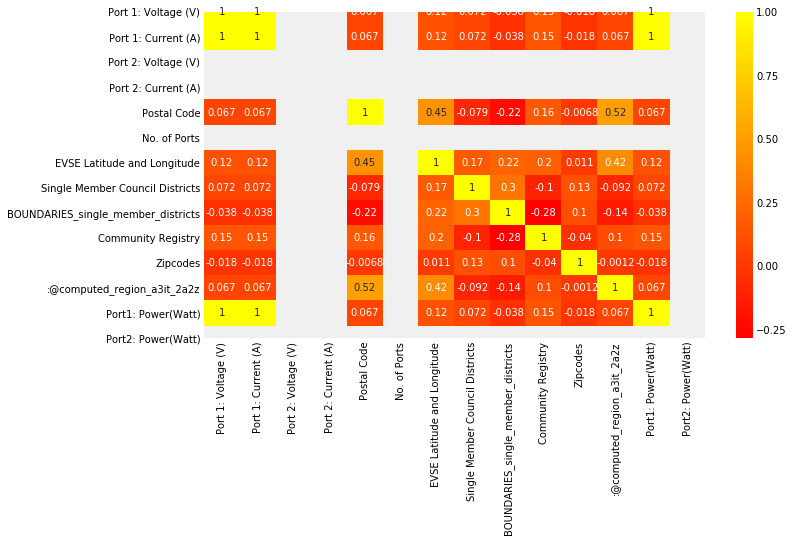

In [30]:
## correlation check
plt.figure(figsize = (10,6))
sns.heatmap(data1.corr(), cmap ='autumn',annot = True )

In [31]:
corr=data1.corr()
corr.style.background_gradient(cmap='coolwarm')

,Port 1: Voltage (V),Port 1: Current (A),Port 2: Voltage (V),Port 2: Current (A),Postal Code,No. of Ports,EVSE Latitude and Longitude,Single Member Council Districts,BOUNDARIES_single_member_districts,Community Registry,Zipcodes,:@computed_region_a3it_2a2z,Port1: Power(Watt),Port2: Power(Watt)
Port 1: Voltage (V),1,1,nan,nan,0.0667946,nan,0.124368,0.0723182,-0.0384898,0.147092,-0.0181729,0.0669772,1,nan
Port 1: Current (A),1,1,nan,nan,0.0667946,nan,0.124368,0.0723182,-0.0384898,0.147092,-0.0181729,0.0669772,1,nan
Port 2: Voltage (V),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Port 2: Current (A),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Postal Code,0.0667946,0.0667946,nan,nan,1,nan,0.453246,-0.0793058,-0.222409,0.161005,-0.00677227,0.517787,0.0667946,nan
No. of Ports,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EVSE Latitude and Longitude,0.124368,0.124368,nan,nan,0.453246,nan,1,0.169623,0.218509,0.202391,0.0112519,0.422414,0.124368,nan
Single Member Council Districts,0.0723182,0.0723182,nan,nan,-0.0793058,nan,0.169623,1,0.298915,-0.102745,0.12684,-0.0922658,0.0723182,nan
BOUNDARIES_single_member_districts,-0.0384898,-0.0384898,nan,nan,-0.222409,nan,0.218509,0.298915,1,-0.283593,0.104017,-0.14418,-0.0384898,nan
Community Registry,0.147092,0.147092,nan,nan,0.161005,nan,0.202391,-0.102745,-0.283593,1,-0.0402642,0.100072,0.147092,nan


In [32]:
data1.corr()

,Port 1: Voltage (V),Port 1: Current (A),Port 2: Voltage (V),Port 2: Current (A),Postal Code,No. of Ports,EVSE Latitude and Longitude,Single Member Council Districts,BOUNDARIES_single_member_districts,Community Registry,Zipcodes,:@computed_region_a3it_2a2z,Port1: Power(Watt),Port2: Power(Watt)
Port 1: Voltage (V),1.000000,1.000000,NaN,NaN,0.066795,NaN,0.124368,0.072318,-0.038490,0.147092,-0.018173,0.066977,1.000000,NaN
Port 1: Current (A),1.000000,1.000000,NaN,NaN,0.066795,NaN,0.124368,0.072318,-0.038490,0.147092,-0.018173,0.066977,1.000000,NaN
Port 2: Voltage (V),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Port 2: Current (A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,0.066795,0.066795,NaN,NaN,1.000000,NaN,0.453246,-0.079306,-0.222409,0.161005,-0.006772,0.517787,0.066795,NaN
No. of Ports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EVSE Latitude and Longitude,0.124368,0.124368,NaN,NaN,0.453246,NaN,1.000000,0.169623,0.218509,0.202391,0.011252,0.422414,0.124368,NaN
Single Member Council Districts,0.072318,0.072318,NaN,NaN,-0.079306,NaN,0.169623,1.000000,0.298915,-0.102745,0.126840,-0.092266,0.072318,NaN
BOUNDARIES_single_member_districts,-0.038490,-0.038490,NaN,NaN,-0.222409,NaN,0.218509,0.298915,1.000000,-0.283593,0.104017,-0.144180,-0.038490,NaN
Community Registry,0.147092,0.147092,NaN,NaN,0.161005,NaN,0.202391,-0.102745,-0.283593,1.000000,-0.040264,0.100072,0.147092,NaN


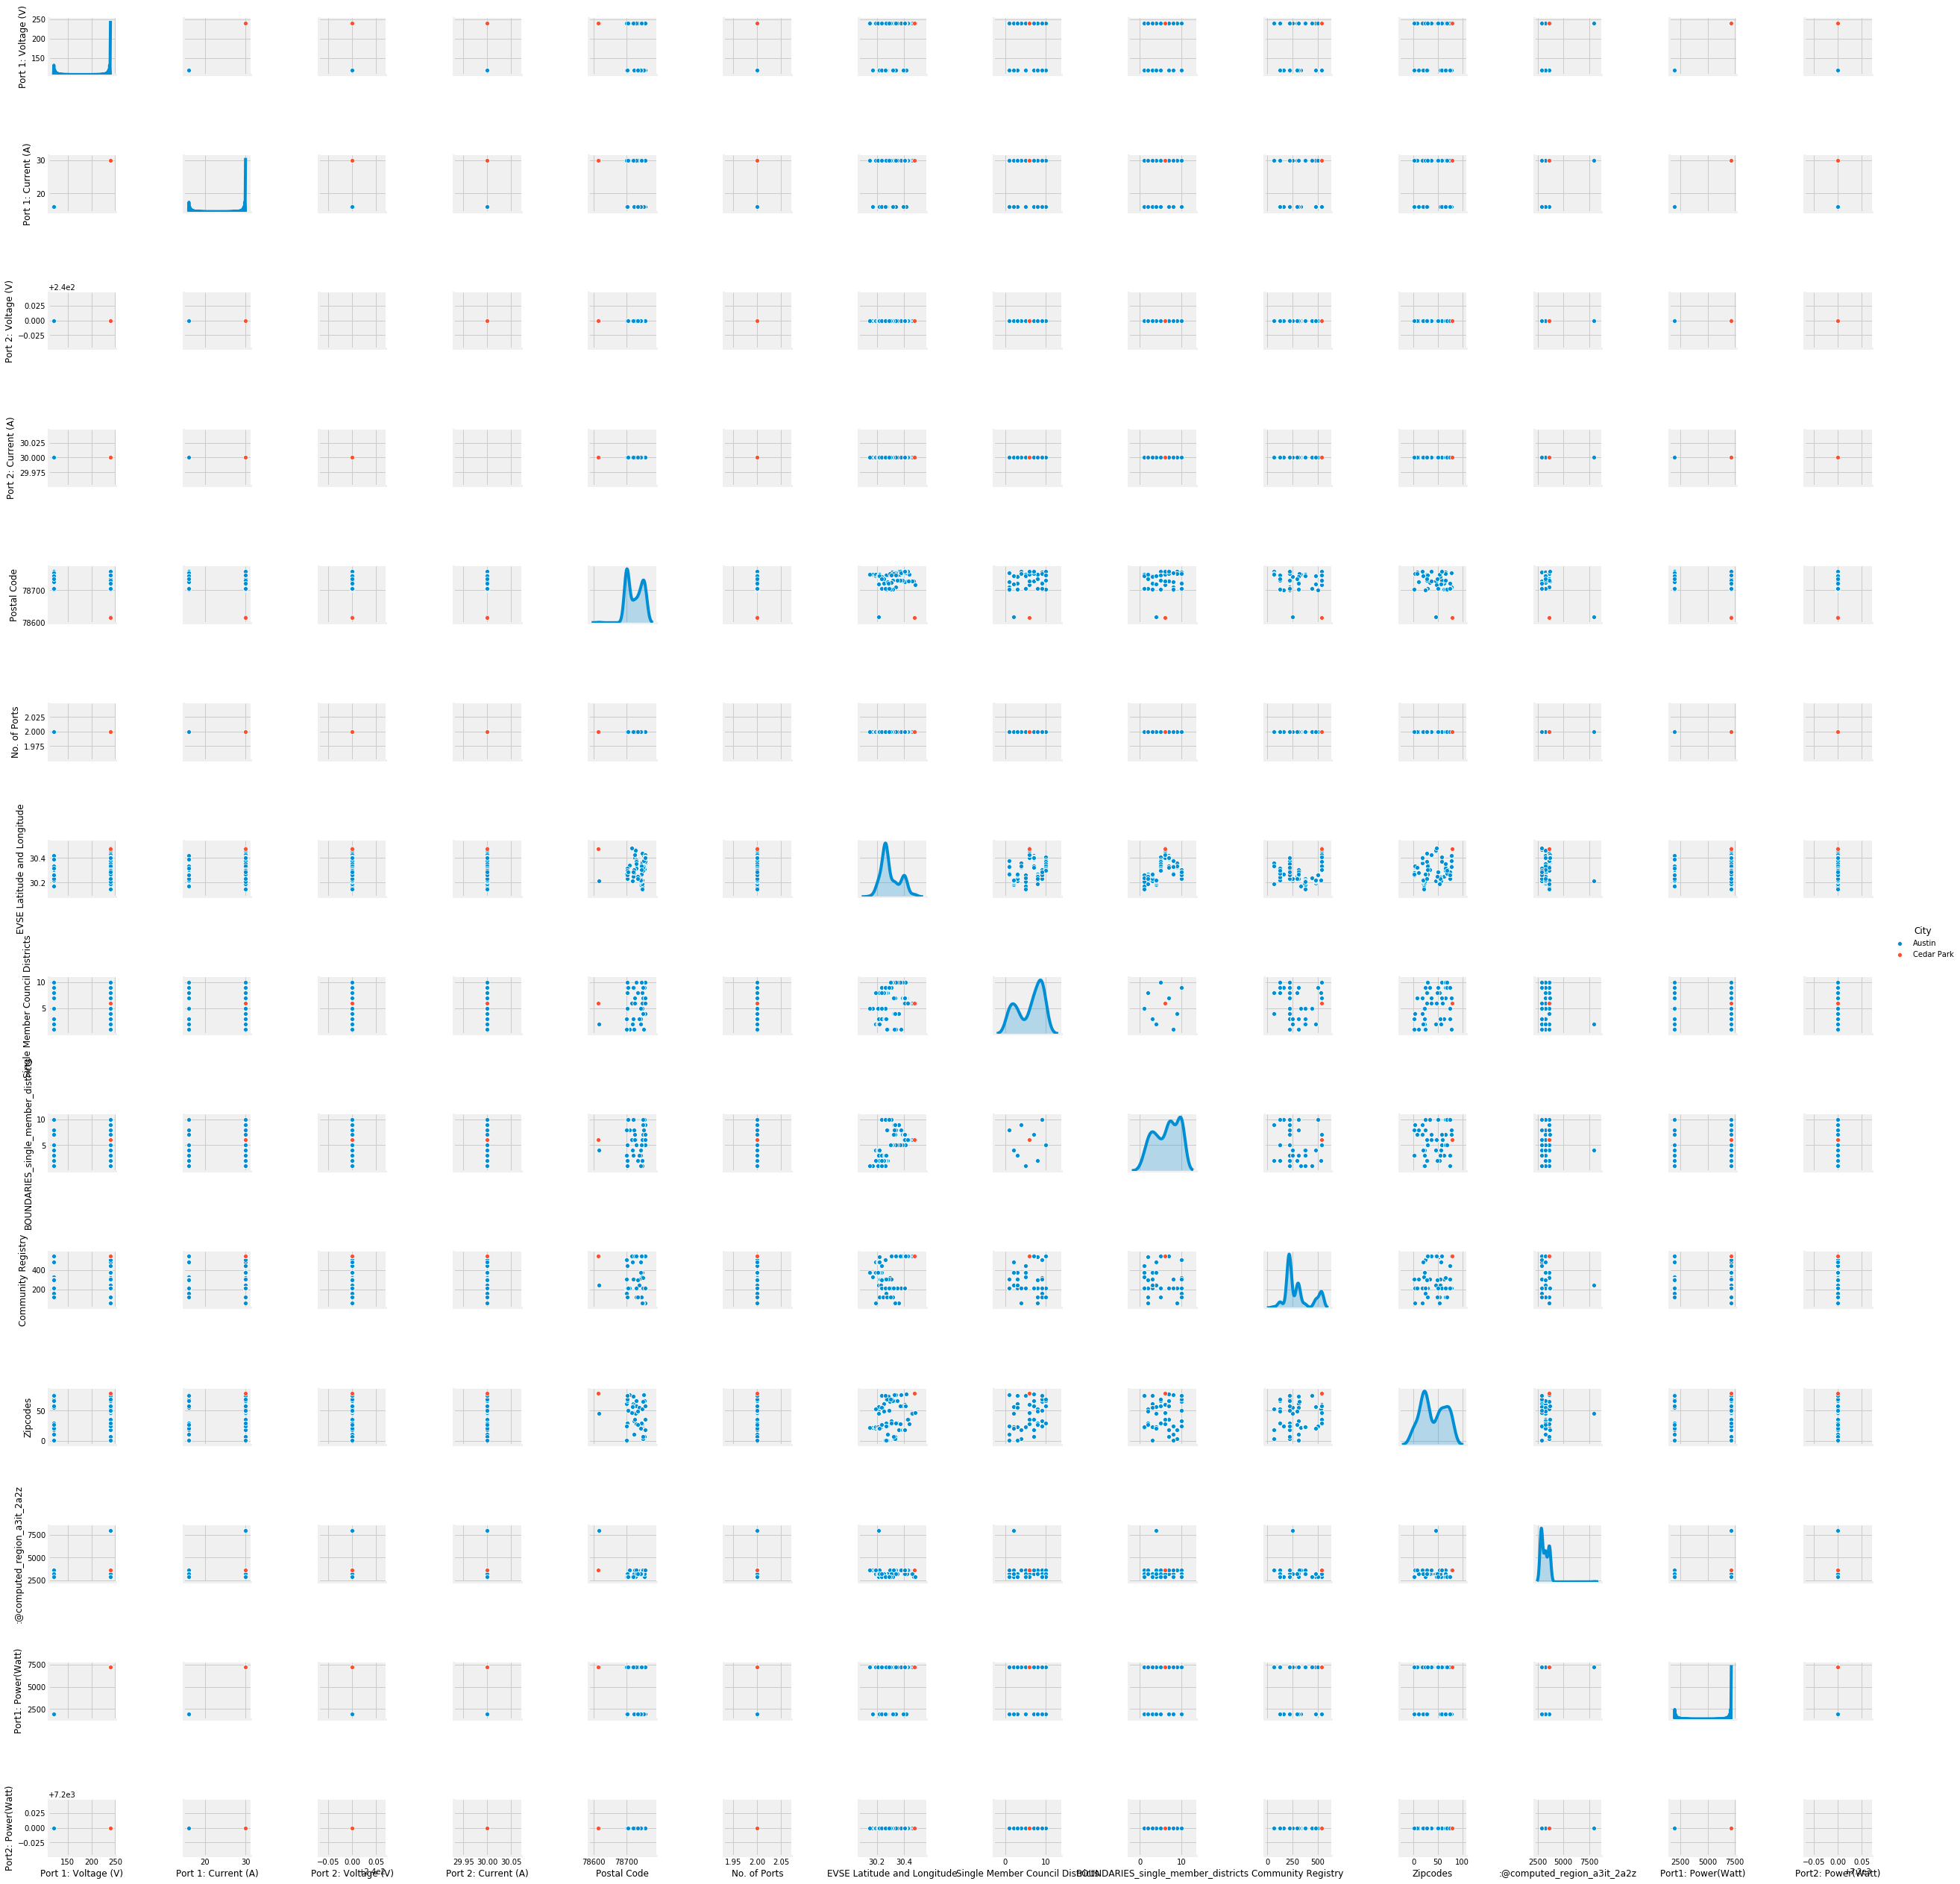

In [33]:
#pairplot
sns.pairplot(data1,hue= 'City')

In [34]:
data1.head()

,Station Display Name,Access Category,Port 1: Voltage (V),Port 1: Current (A),Port 1: Connector Type,Port 2: Voltage (V),Port 2: Current (A),Port 2: Connector Type,Org Name,Address 1,...,No. of Ports,EVSE Latitude and Longitude,New Georeferenced Column,Single Member Council Districts,BOUNDARIES_single_member_districts,Community Registry,Zipcodes,:@computed_region_a3it_2a2z,Port1: Power(Watt),Port2: Power(Watt)
0,AISD PAC / AISD PAC #2,Education,240,30,J1772,240,30,J1772,Austin independent school district,1301-1603 E 51st St,...,2,30.30538,"(30.30538, -97.702537)",9.0,10.0,309,33,3239,7200,7200
1,CHAMPION OFFICE / EV #2,Workplace,240,30,J1772,240,30,J1772,Champion office park,6433 Champion Grandview Way,...,2,30.36320,"(30.3632, -97.793703)",10.0,5.0,540,28,3639,7200,7200
2,CP LEASING / STATION 01,Multifamily Commercial,240,30,J1772,240,30,J1772,Cardinal point,11015 four points dr,...,2,30.39921,"(30.39921, -97.846895)",6.0,6.0,540,60,3246,7200,7200
3,DOMAIN / STATION 1,Parking,240,30,J1772,240,30,J1772,Domain junction,11601 Alterra Parkway,...,2,30.40227,"(30.40227, -97.718828)",7.0,7.0,217,18,3646,7200,7200
4,ENDEAVOR REG / NORDSTROM L2 #2,Parking,240,30,J1772,240,30,J1772,Endeavor real estate group,11501 Alterra Pkwy,...,2,30.40157,"(30.40157, -97.719909)",7.0,7.0,217,18,3646,7200,7200


## EDA

In [35]:
data1['Station Display Name'].nunique()

342

#### Observation:-
- Every station display name is unique for all 342 columns.

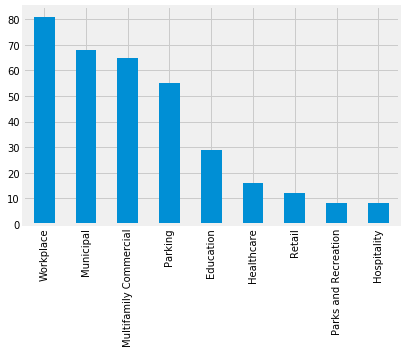

In [36]:
data1['Access Category'].value_counts().plot(kind = 'bar')

#### Observations:-
- we have more plug points in the Workplace and least in parks and recreation.
- top 3 access point categories:-
    - **Work place**
    - **Muncipal**
    - **Multifamily commercial**

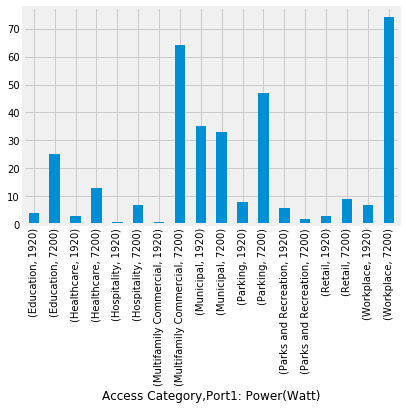

In [37]:
data1.groupby(['Access Category','Port1: Power(Watt)'])['Port1: Power(Watt)'].count().plot(kind = 'bar')

In [38]:
roh = pd.DataFrame(data1.groupby(['Access Category','Port 1: Connector Type'])['Port 1: Connector Type'].count())
roh.columns = ['Count1',]
roh = roh.reset_index()

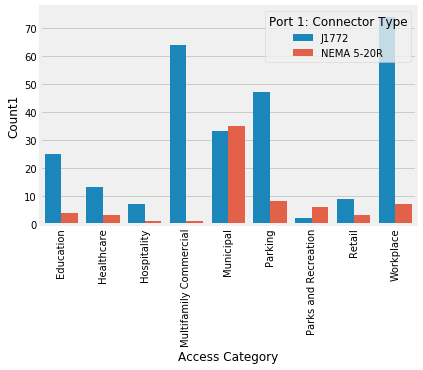

In [39]:
sns.barplot(x = 'Access Category',y = 'Count1',hue = 'Port 1: Connector Type', data = roh)
plt.xticks(rotation = '90')
plt.show()

In [40]:
hi = pd.DataFrame(data1.groupby(['Access Category','Port 2: Connector Type'])['Port 2: Connector Type'].count())
#hi.columns =['Count1','Count2']
#hi = hi.reset_index()

In [41]:
data1.groupby

<bound method NDFrame.groupby of                Station Display Name         Access Category  \
0            AISD PAC / AISD PAC #2               Education   
1           CHAMPION OFFICE / EV #2               Workplace   
2           CP LEASING / STATION 01  Multifamily Commercial   
3                DOMAIN / STATION 1                 Parking   
4    ENDEAVOR REG / NORDSTROM L2 #2                 Parking   
..                              ...                     ...   
394                PIE AE / ERCOT 2               Workplace   
395         PIE AE / PUB ACC EVIEW2               Education   
396        PIE AE / PUBACCPINNACLE1               Education   
398        PIE AE / PALMER STATION5                 Parking   
399        PIE AE / PUB UTANTONIO 1               Education   

     Port 1: Voltage (V)  Port 1: Current (A) Port 1: Connector Type  \
0                    240                   30                  J1772   
1                    240                   30                  J17

In [42]:
org_name=['Education','Education','Healthcare','Healthcare','Hospitality','Hospitality','Multifamily Commercial','Multifamily Commercial','Municipal','Municipal','Parking','Parking','Parks and Recreation','Parks and Recreation','Retail','Retail','Workplace','Workplace']
type_socket=['J1772','NEMA 5-20R','J1772','NEMA 5-20R']
port_sum=[29,4,16,3]

### Port1

In [43]:
data1['Port1: Power(Watt)']


0      7200
1      7200
2      7200
3      7200
4      7200
       ... 
394    1920
395    7200
396    1920
398    1920
399    7200
Name: Port1: Power(Watt), Length: 342, dtype: int64

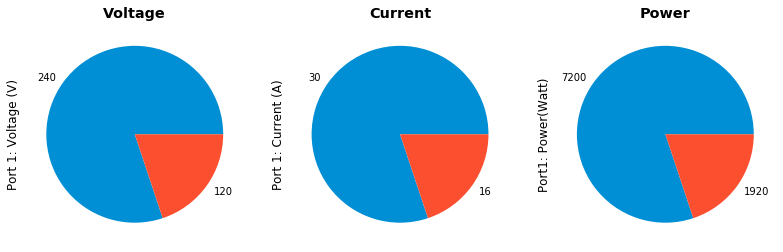

In [44]:
fig = plt.figure(figsize = (12,6))

ax = fig.add_subplot(131)
plt.title('Voltage',weight = 'bold')
data1['Port 1: Voltage (V)'].value_counts().plot(kind = 'pie')
#plt.ylabel('')

ax = fig.add_subplot(132)
plt.title('Current',weight = 'bold')
data1['Port 1: Current (A)'].value_counts().plot(kind = 'pie')

ax = fig.add_subplot(133)
plt.title('Power',weight = 'bold')
data1['Port1: Power(Watt)'].value_counts().plot(kind = 'pie')

plt.show()

#### Total no of connector types?

In [45]:
data1['Port 1: Connector Type'].value_counts()

J1772         274
NEMA 5-20R     68
Name: Port 1: Connector Type, dtype: int64

In [46]:
data1.groupby(['City','Port 1: Connector Type'])['Port 1: Connector Type'].count()

City        Port 1: Connector Type
Austin      J1772                     273
            NEMA 5-20R                 68
Cedar Park  J1772                       1
Name: Port 1: Connector Type, dtype: int64

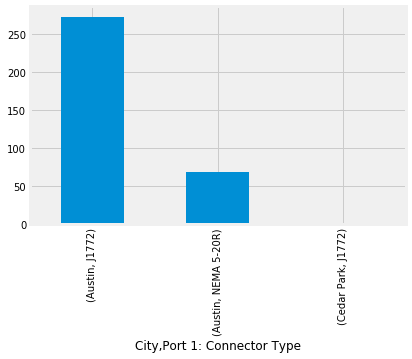

In [47]:
data1.groupby(['City','Port 1: Connector Type'])['Port 1: Connector Type'].count().plot(kind = 'bar')

#### Observation
- We have 2 types of port1:connectors
    - **J1772**
    - **NEMA 5-20R**
- City AUSTIN had 273 J1772 connectors + 68 NEMA 5-20R
- City CEDAR PARK had 1 J1772 connetor at
    - **Address**:-  2801 S Lakeline Blvd
    - **Org Name**:- North American Properties
    - **coordinates**:- (30.474919, -97.809793)

In [48]:
#### port1 nema5 charger
data1[data1['Port 1: Connector Type'] == 'NEMA 5-20R'].head(1)

,Station Display Name,Access Category,Port 1: Voltage (V),Port 1: Current (A),Port 1: Connector Type,Port 2: Voltage (V),Port 2: Current (A),Port 2: Connector Type,Org Name,Address 1,...,No. of Ports,EVSE Latitude and Longitude,New Georeferenced Column,Single Member Council Districts,BOUNDARIES_single_member_districts,Community Registry,Zipcodes,:@computed_region_a3it_2a2z,Port1: Power(Watt),Port2: Power(Watt)
14,PIE AE / KRAMER 01,Municipal,120,16,NEMA 5-20R,240,30,J1772,Austin energy,2526 Kramer Ln,...,2,30.394697,"(30.394697, -97.716885)",7.0,7.0,217,18,3646,1920,7200


so the port1: connector type "NEMA 5-20R" has 120V and 16A.

### Port2

In [49]:
data1['Port 2: Voltage (V)'].value_counts()

240    342
Name: Port 2: Voltage (V), dtype: int64

In [50]:
data1['Port 2: Current (A)'].value_counts()

30    342
Name: Port 2: Current (A), dtype: int64

In [51]:
data1['Port 2: Connector Type'].value_counts()

J1772    342
Name: Port 2: Connector Type, dtype: int64

In [52]:
data1.groupby(['City','Port 2: Connector Type'])['Port 2: Connector Type'].count()

City        Port 2: Connector Type
Austin      J1772                     341
Cedar Park  J1772                       1
Name: Port 2: Connector Type, dtype: int64

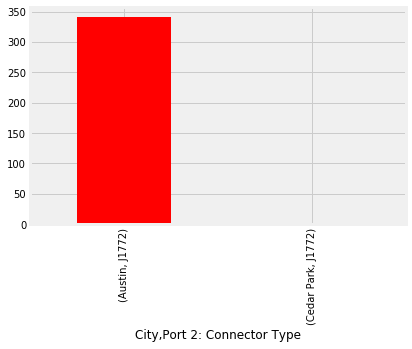

In [53]:
data1.groupby(['City','Port 2: Connector Type'])['Port 2: Connector Type'].count().plot(kind = 'bar',color = 'red')

#### Observations:-
- we have 342 240V datapoints which is of whole dataset.
- we also have 30A datapoints of 342 which is whole.
- we have only one type of Connetor type, i.e 
    - **J1772**
- we have 341 J1772 connectors in Austin.
- we have only 1 J1772 connector in Cedar park at
    - **Address**:-  2801 S Lakeline Blvd
    - **Org Name**:- North American Properties
    - **coordinates**:- (30.474919, -97.809793)

### Org Name

In [54]:
orgdf = data1['Org Name'].value_counts()
orgdf = pd.DataFrame(orgdf.reset_index())
orgdf.columns = ['Organization Name','NO Of Charging stations']

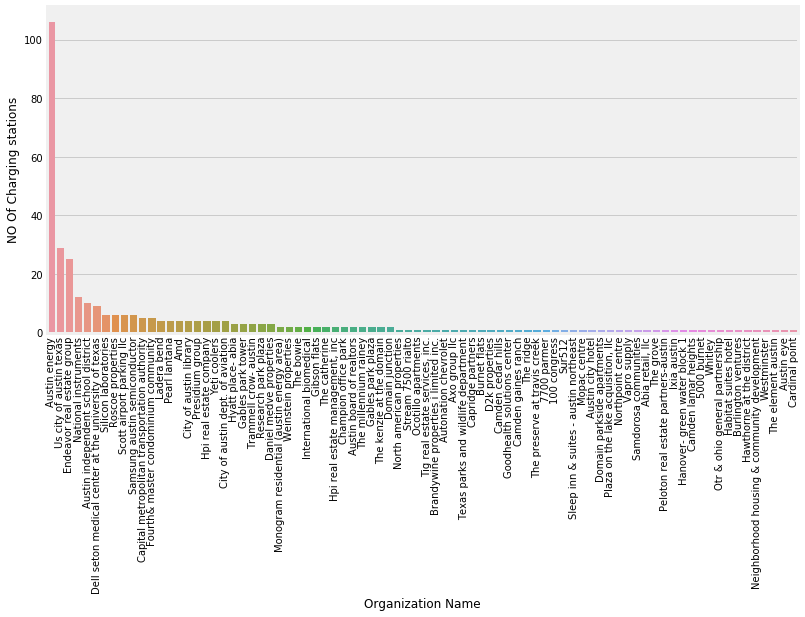

In [55]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Organization Name',y = 'NO Of Charging stations',data = orgdf)
plt.xticks(rotation = '90')
plt.show()

#### Observation:-
- Austin Energy is a publicly owned utility providing electrical power to the city of Austin, Texas and surrounding areas. Established in 1895, the utility is a department of the City of Austin and returns its profits to the city's general fund to finance other city services.
- **Top3 organizations with highest charging points**.
    - Austin energy
    - US city of Austin Texas
    - Endeavor Real Estate Group
- **Org with least charge stations**
    - Camden Lamar Heights

In [56]:
print("Austin Point Charge point with 2 ports")
from IPython.display import Image
Image(url='https://res-2.cloudinary.com/dostuff-media/image/upload//w_1200,q_75,c_limit,f_auto/v1488214956/page-image-8698-65c0a866-8508-431c-8bec-c35a66a1423b.jpg')

Austin Point Charge point with 2 ports


### Postal code

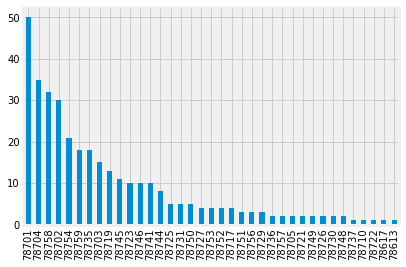

In [57]:
data1['Postal Code'].value_counts().plot(kind = 'bar')

#### Observations:-
- we have more number of charging stations at Postal code 78701
- **Top 3 Postal codes with highest charging statinos**
    - 78701
    - 78704
    - 78758

### No of Ports

In [58]:
data1['No. of Ports'].unique()

array([2])

#### Observation:-
- **Total no of ports every charge station had is 2**.

### Community Registry

In [59]:
data1['Community Registry']

0      309
1      540
2      540
3      217
4      217
      ... 
394    484
395    309
396    295
398    217
399    217
Name: Community Registry, Length: 342, dtype: int64

#### Location of Charging points

In [60]:
data1['New Georeferenced Column']= data1['New Georeferenced Column'].str.replace("(","")
data1['New Georeferenced Column'] =data1['New Georeferenced Column'].str.replace(')','')

In [61]:
data1[['Lat','long']] = data1['New Georeferenced Column'].str.split(",",expand=True)

def fun(x):
    n=0
    lis=[]
    while(n<len(x)):
        lis.append(x.str.split(",").iloc[n][0])
        n+=1
    return lis

fun(data1['New Georeferenced Column'])

In [62]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [63]:


heatmap = folium.Map(location=[30.2672,-97.7431], zoom_start = 10)

heat_data = [[row['Lat'],row['long']] for index, row in
             data1[['Lat', 'long']][:3000].iterrows()]

hh =  HeatMap(heat_data).add_to(heatmap)


minimap = plugins.MiniMap(tile_layer=None,
    position='bottomright',
    width=150,
    height=150,
    collapsed_width=5,
    collapsed_height=5,
    zoom_level_offset=-5,#for minimap zoom
    zoom_level_fixed=None,
    center_fixed=False,
    zoom_animation=True,
    toggle_display=False,
    auto_toggle_display=False,
    minimized=False
)

heatmap.add_child(minimap)

heatmap

In [64]:
colordict = {'Workplace': 'red', 'Municipal': 'blue', 'Multifamily Commercial' : 'orange','Parking':'gold','Education':'green','Healthcare':'black','Retail':'voilet','Parks and Recreation':'lightblue','Hospitality':'skyblue'}

In [65]:
latitude = 30.2672
longitude = -97.7431
traffic_map = folium.Map(location=[latitude, longitude])

In [66]:
for lat, lon, Access, port1,port2, org,loc in zip(data1['Lat'], data1['long'], data1['Access Category'],data1["Port 1: Connector Type"],data1["Port 1: Connector Type"],data1['Org Name'],data1['New Georeferenced Column']):
    folium.CircleMarker(
        [lat, lon],
        popup = ('Access Category: ' + str(Access).capitalize() + '<br>'
                 'Organization: ' + str(org)+ '<br>'
                'Location:'+ str(loc) + '<br>'
                'Port1 Type:'+str(port1)+'<br>'
                'port2 Type:'+str(port2)),
        color='b',
        key_on = Access,
        threshold_scale=[0,1,2,3],
        fill_color=colordict[Access],
        fill=True,
        fill_opacity=0.7
        ).add_to(traffic_map)
traffic_map

In [67]:
data1.T

,0,1,2,3,4,5,6,8,9,10,...,389,390,391,392,393,394,395,396,398,399
Station Display Name,AISD PAC / AISD PAC #2,CHAMPION OFFICE / EV #2,CP LEASING / STATION 01,DOMAIN / STATION 1,ENDEAVOR REG / NORDSTROM L2 #2,ENDEAVOR REG / STATION 2,HANOVER / LANTANA HILLS,HYATT PLACE / HP STATION 2,INT-BIO EV CHGR / INTBIO EV CHGR1,LEASING OFFICE / STATION 1,...,PIE AE / PUBGABLESPRESS2,PIE AE / 2201 E 6TH ST,AISD PAC / TRAVIS2,PIE-CAPRIDGE / #1,PIE AE / HOWSONBRCHLIBR2,PIE AE / ERCOT 2,PIE AE / PUB ACC EVIEW2,PIE AE / PUBACCPINNACLE1,PIE AE / PALMER STATION5,PIE AE / PUB UTANTONIO 1
Access Category,Education,Workplace,Multifamily Commercial,Parking,Parking,Workplace,Multifamily Commercial,Hospitality,Workplace,Multifamily Commercial,...,Multifamily Commercial,Healthcare,Education,Workplace,Municipal,Workplace,Education,Education,Parking,Education
Port 1: Voltage (V),240,240,240,240,240,240,240,240,240,240,...,240,120,240,240,240,120,240,120,120,240
Port 1: Current (A),30,30,30,30,30,30,30,30,30,30,...,30,16,30,30,30,16,30,16,16,30
Port 1: Connector Type,J1772,J1772,J1772,J1772,J1772,J1772,J1772,J1772,J1772,J1772,...,J1772,NEMA 5-20R,J1772,J1772,J1772,NEMA 5-20R,J1772,NEMA 5-20R,NEMA 5-20R,J1772
Port 2: Voltage (V),240,240,240,240,240,240,240,240,240,240,...,240,240,240,240,240,240,240,240,240,240
Port 2: Current (A),30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
Port 2: Connector Type,J1772,J1772,J1772,J1772,J1772,J1772,J1772,J1772,J1772,J1772,...,J1772,J1772,J1772,J1772,J1772,J1772,J1772,J1772,J1772,J1772
Org Name,Austin independent school district,Champion office park,Cardinal point,Domain junction,Endeavor real estate group,Endeavor real estate group,Hanover- green water block 1,Hyatt place- abia,International biomedical,Ocotillo apartments,...,Austin energy,Austin energy,Austin independent school district,Capridge partners,Austin energy,Austin energy,Austin energy,Austin energy,Austin energy,Austin energy
Address 1,1301-1603 E 51st St,6433 Champion Grandview Way,11015 four points dr,11601 Alterra Parkway,11501 Alterra Pkwy,11001 Lakeline Blvd,6601Rialto Blvd,Presidential Blvd,8206 Cross Park Dr,8000 US-290,...,507 Pressler St,2201 E 6th St,1211 E Oltorf St.,115 Wild Basin Rd,2500 Exposition blvd,7620 Metro Center Dr,3401 Webberville Rd,7748 Hwy 290 W,846-888 Barton Springs Rd,2420 San Antonio St


## Notes
#### single state = Texas
#### 2 cities = Austin, Cedar Park
#### replaced -- with NaN's in port2:v
#### EVSE = Electric vehicle supply equipment
#### google shows traffic camera images for this column :@computed_region_a3it_2a2z 
#### is community registery, the register for people with electric cars or no of residents in that community.

